In [2]:
#Data Exploration and EDA Process


#Step-1
#Importing All labreries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


#Step-2

#Reading or importing CSV filr to anconda server,if we place it in local folder need to mention the entire path 

df=pd.read_csv("titanica.csv")

df.head(4) #reading head -4 C=Rows  of the file 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
#Step-3:---Data Preprocessing

#Seperating Entire data set into two data set (Number Dataset & Character Dataset)-Here seperating Number dataset
#Printing the head data simltanously

df_num=df.select_dtypes(include=[np.number])
df_num.head(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000


In [ ]:
# Seperating Entire data set into two data set (Number Dataset & Character Dataset)-Here seperating Character dataset
#Printing the head data simltanously

df_cat=df.select_dtypes(include=[object])
df_cat.head(4)

# Step-4:--Cleaning Number dataset


In [5]:
#Removing Nulls - For Removing null we need to identify where are the nulls
df_num.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [6]:
#for our information we should know how many rows & colimns in dataset
df.shape

(891, 12)

In [7]:
#Caluclate the percentage of null colums & entire columns
(df_num.Age.isnull().sum())/len(df_num)



0.19865319865319866

In [8]:
#Replacing the Null values by mean value
df_num.Age.fillna(df_num.Age.mean(),inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
#Rechecking the filled data
df_num.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# Step-5 :-Cleaning Character dataset

In [10]:
#Removing Nulls - For Removing null we need to identify where are the nulls
df_cat.isnull().sum()


Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [13]:
#Caluclate the percentage of null colums & entire columns
(df_cat.Cabin.isnull().sum())/len(df_cat)

0.7710437710437711

In [14]:
#Caluclate the percentage of null colums & entire columns
(df_cat.Embarked.isnull().sum())/len(df_num)

0.002244668911335578

In [15]:
#Replacing the Null values by placing max repeated value
df_cat.Cabin.fillna(df_cat.Cabin.value_counts().idxmax(),inplace=True)

df_cat.Embarked.fillna(df_cat.Embarked.value_counts().idxmax(),inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
#Rechecking the filled data
df_cat.isnull().sum()


Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [19]:
#Converting all text data into numeric data we are using lable encoer and then fit into caracter dataset again

le=LabelEncoder()

df_cat = df_cat.apply(le.fit_transform)

In [20]:
#Step-7:-Merging 

#Concatinating the both Number Dataset & Carater dataset -Use Conatinating function 

df_final = pd.concat([df_num,df_cat],axis=1)


In [21]:
#Step-8:-Toc check wheter the data is replaced with preprocess data 
df_final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,108,1,523,63,2
1,2,1,1,38.0,1,0,71.2833,190,0,596,81,0
2,3,1,3,26.0,0,0,7.9250,353,0,669,63,2
3,4,1,1,35.0,1,0,53.1000,272,0,49,55,2
4,5,0,3,35.0,0,0,8.0500,15,1,472,63,2


# Data Exploration and analysis

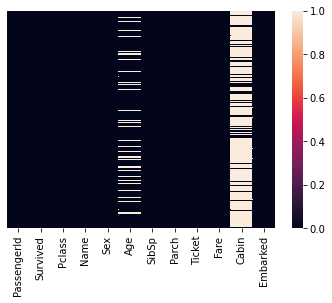

In [12]:
import seaborn as sns     #Importing library  form EDA analysis
sns.heatmap(df.isnull(),yticklabels=False)    #Heatmap for the original dataset before removing null set

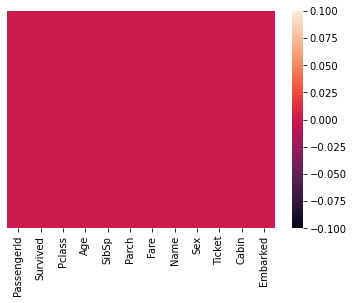

In [27]:
sns.heatmap(df_final.isnull(),yticklabels=False)  #Heatmap for the original dataset before removing null set

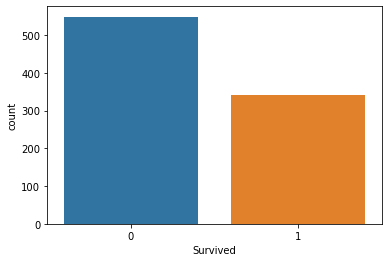

In [18]:
sns.countplot(x='Survived',data=df)   #Countplot for the original dataset before removing null set-gives us how many people are survives in the ship in a graphical way

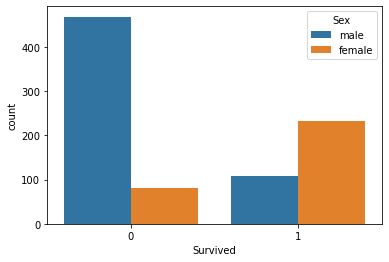

In [24]:
sns.countplot(x='Survived',hue='Sex',data=df)  #Countplot for the original dataset before removing null set-gives us how many people are survived with respect tp male and female  in the ship in a graphical way

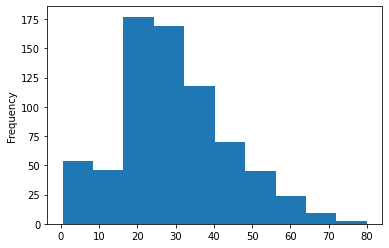

In [25]:
df["Age"].plot.hist() #Showshows many people are there in ship with respective of their age group in a graphical way(Hist)

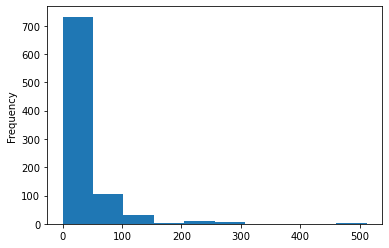

In [26]:
df["Fare"].plot.hist() #Shows  fares of the ship in a graphical way(Hist)